In [1]:
#### Dataset Link - https://drive.google.com/file/d/1OUbjZvFJT6yrLtZAJBsv7BCPttX2-Ru8/view

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data['Purchased'].unique()

array([0, 1])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
gender = pd.get_dummies(data["Gender"],drop_first=True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [7]:
data['Gender'] = gender
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])

In [10]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,1.569154e+07,0.490000,-7.105427e-17,-1.776357e-17,0.357500
std,7.165832e+04,0.500526,1.001252e+00,1.001252e+00,0.479864
min,1.556669e+07,0.000000,-1.877311e+00,-1.607506e+00,0.000000
25%,1.562676e+07,0.000000,-7.550313e-01,-7.852897e-01,0.000000
50%,1.569434e+07,0.000000,-6.256110e-02,7.561451e-03,0.000000
75%,1.575036e+07,1.000000,7.970571e-01,5.361289e-01,1.000000
max,1.581524e+07,1.000000,2.134241e+00,2.356750e+00,1.000000


In [11]:
x = data[['Gender','Age','EstimatedSalary']]   ## feature
y = data['Purchased']   ## target

In [12]:
print(x.shape)
print(y.shape)

(400, 3)
(400,)


In [13]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [14]:
### Split the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=6)

In [15]:
ytrain.value_counts()

0    205
1    115
Name: Purchased, dtype: int64

In [16]:
#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
ypred = log.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [19]:
ytest.values

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,ypred)
score

0.8875

In [21]:
#### Change Threshold Value

In [22]:
ypred_new = log.predict_proba(xtest)
ypred_new

array([[0.8214493 , 0.1785507 ],
       [0.96910222, 0.03089778],
       [0.97178707, 0.02821293],
       [0.91486379, 0.08513621],
       [0.99528746, 0.00471254],
       [0.64786881, 0.35213119],
       [0.99187998, 0.00812002],
       [0.66120119, 0.33879881],
       [0.5110051 , 0.4889949 ],
       [0.82094007, 0.17905993],
       [0.85343422, 0.14656578],
       [0.10304116, 0.89695884],
       [0.52967294, 0.47032706],
       [0.91346982, 0.08653018],
       [0.96422753, 0.03577247],
       [0.61476894, 0.38523106],
       [0.66068924, 0.33931076],
       [0.73323156, 0.26676844],
       [0.25081742, 0.74918258],
       [0.64918005, 0.35081995],
       [0.14309393, 0.85690607],
       [0.90184934, 0.09815066],
       [0.9704019 , 0.0295981 ],
       [0.95820049, 0.04179951],
       [0.48084324, 0.51915676],
       [0.68002678, 0.31997322],
       [0.5406962 , 0.4593038 ],
       [0.05198524, 0.94801476],
       [0.11357535, 0.88642465],
       [0.9704019 , 0.0295981 ],
       [0.

In [23]:
threshold = 0.4
ypred_new = log.predict_proba(xtest)[:,1]
ypred_new = ypred_new >= threshold
ypred_new = ypred_new.astype('int')
ypred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,ypred_new)
score

0.825

In [25]:
### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred_knn = knn.predict(xtest)
ypred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,ypred_knn)
score

0.9375

In [28]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [29]:
recall = recall_score(ytest,ypred_knn)
precision = precision_score(ytest,ypred_knn)
f1 = f1_score(ytest,ypred_knn)
print("Recall:",recall)
print("Precision:",precision)
print("F1-Score:",f1)

Recall: 0.9285714285714286
Precision: 0.896551724137931
F1-Score: 0.912280701754386


In [30]:
recall = recall_score(ytest,ypred)
precision = precision_score(ytest,ypred)
f1 = f1_score(ytest,ypred)
print("Recall:",recall)
print("Precision:",precision)
print("F1-Score:",f1)

Recall: 0.7857142857142857
Precision: 0.88
F1-Score: 0.830188679245283


In [31]:
from sklearn.metrics import roc_curve

In [32]:
mypred = log.predict_proba(xtest)[:,1]
mypred

array([0.1785507 , 0.03089778, 0.02821293, 0.08513621, 0.00471254,
       0.35213119, 0.00812002, 0.33879881, 0.4889949 , 0.17905993,
       0.14656578, 0.89695884, 0.47032706, 0.08653018, 0.03577247,
       0.38523106, 0.33931076, 0.26676844, 0.74918258, 0.35081995,
       0.85690607, 0.09815066, 0.0295981 , 0.04179951, 0.51915676,
       0.31997322, 0.4593038 , 0.94801476, 0.88642465, 0.0295981 ,
       0.02945363, 0.01658262, 0.60951801, 0.00222737, 0.52050396,
       0.76037993, 0.55890311, 0.89421859, 0.00796012, 0.20688325,
       0.33106879, 0.33646421, 0.00898259, 0.0576066 , 0.07712255,
       0.01771968, 0.97618947, 0.34381999, 0.85264695, 0.19373111,
       0.91913695, 0.94406113, 0.19804323, 0.39247664, 0.00545647,
       0.01816175, 0.68775503, 0.40969593, 0.36160603, 0.72483207,
       0.97806706, 0.0497632 , 0.94486879, 0.31471682, 0.44936262,
       0.39119046, 0.00730645, 0.10779365, 0.88136009, 0.04755172,
       0.8615273 , 0.63337465, 0.51636406, 0.31872281, 0.98474

In [33]:
fpr,tpr,thresholds = roc_curve(ytest,mypred)

In [34]:
df = pd.DataFrame()
df['FPR'] = fpr
df['TPR'] = tpr
df['Threshold'] = thresholds
df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.990875
1,0.000000,0.035714,0.990875
2,0.000000,0.500000,0.856906
3,0.019231,0.500000,0.852647
4,0.019231,0.642857,0.687755
5,0.038462,0.642857,0.633375
6,0.038462,0.785714,0.519157
7,0.211538,0.785714,0.385231
8,0.211538,0.892857,0.350820
9,0.288462,0.892857,0.338799


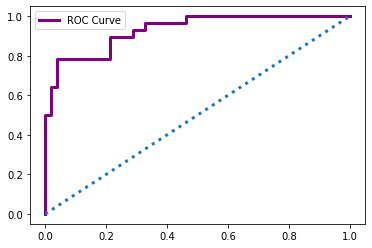

In [35]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='purple',label="ROC Curve",lw=3)
plt.plot([0,1],[0,1],linestyle='dotted',lw=3)
plt.legend()
plt.show()

In [36]:
mypred

array([0.1785507 , 0.03089778, 0.02821293, 0.08513621, 0.00471254,
       0.35213119, 0.00812002, 0.33879881, 0.4889949 , 0.17905993,
       0.14656578, 0.89695884, 0.47032706, 0.08653018, 0.03577247,
       0.38523106, 0.33931076, 0.26676844, 0.74918258, 0.35081995,
       0.85690607, 0.09815066, 0.0295981 , 0.04179951, 0.51915676,
       0.31997322, 0.4593038 , 0.94801476, 0.88642465, 0.0295981 ,
       0.02945363, 0.01658262, 0.60951801, 0.00222737, 0.52050396,
       0.76037993, 0.55890311, 0.89421859, 0.00796012, 0.20688325,
       0.33106879, 0.33646421, 0.00898259, 0.0576066 , 0.07712255,
       0.01771968, 0.97618947, 0.34381999, 0.85264695, 0.19373111,
       0.91913695, 0.94406113, 0.19804323, 0.39247664, 0.00545647,
       0.01816175, 0.68775503, 0.40969593, 0.36160603, 0.72483207,
       0.97806706, 0.0497632 , 0.94486879, 0.31471682, 0.44936262,
       0.39119046, 0.00730645, 0.10779365, 0.88136009, 0.04755172,
       0.8615273 , 0.63337465, 0.51636406, 0.31872281, 0.98474

In [37]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in thresholds:
  y_pred = np.where(mypred>i,1,0)
  accuracy.append(accuracy_score(ytest,y_pred))

In [38]:
df["Accuracy"] = accuracy
df = df.sort_values("Accuracy",ascending=False)
df

,FPR,TPR,Threshold,Accuracy
6,0.038462,0.785714,0.519157,0.8875
5,0.038462,0.642857,0.633375,0.8625
4,0.019231,0.642857,0.687755,0.8500
3,0.019231,0.500000,0.852647,0.8250
2,0.000000,0.500000,0.856906,0.8125
8,0.211538,0.892857,0.350820,0.8125
7,0.211538,0.785714,0.385231,0.8000
9,0.288462,0.892857,0.338799,0.7875
10,0.288462,0.928571,0.336464,0.7750
11,0.326923,0.928571,0.319973,0.7750
